## Testing out lag time series feature on S&P500

Taken setup code from Kaggle tutorial



In [29]:
# Setup notebook
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt

ticker = "SPY"
start = dt.date.today() - dt.timedelta(365)

spy_close = pdr.get_data_yahoo(ticker, start)["Close"]

spy_df = spy_close.to_frame()
spy_df


ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/SPY/history?period1=1635130800&period2=1666753199&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fd4f21d4c40>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [27]:

spy_df['Lag_1'] = spy_df['Close'].shift(1)
spy_df = spy_df.dropna()
spy_df['Time'] = np.arange(len(spy_df.index))
spy_df

/var/folders/6s/k7rt0_9s6116fpzzx9k6kz3c0000gn/T/ipykernel_56612/98797091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_df['Lag_1'] = spy_df['Close'].shift(1)
/var/folders/6s/k7rt0_9s6116fpzzx9k6kz3c0000gn/T/ipykernel_56612/98797091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_df['Time'] = np.arange(len(spy_df.index))


,Close,Time,Lag_1
Date,,,
2021-10-28,458.320007,0,453.940002
2021-10-29,459.250000,1,458.320007
2021-11-01,460.040009,2,459.250000
2021-11-02,461.899994,3,460.040009
2021-11-03,464.720001,4,461.899994
...,...,...,...
2022-10-17,366.820007,243,357.630005
2022-10-18,371.130005,244,366.820007
2022-10-19,368.500000,245,371.130005


Text(0.5, 1.0, 'S&P500 Regression plot')

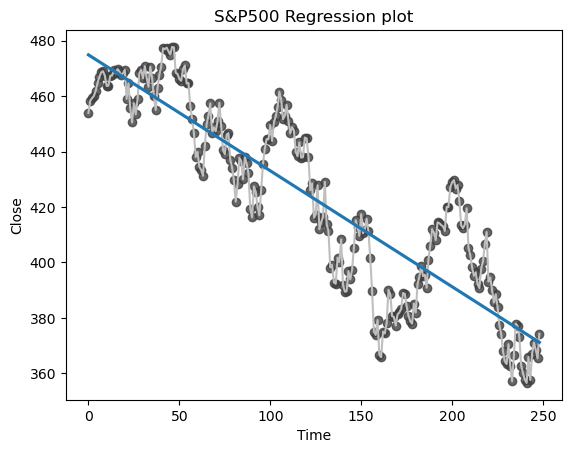

In [19]:
fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=spy_df, color='0.75')
ax = sns.regplot(x='Time', y='Close', data=spy_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('S&P500 Regression plot')


In [30]:
from sklearn.linear_model import LinearRegression

# YOUR CODE HERE: Create training data
X = spy_df.drop('Close', axis=1)  # features
y = spy_df.Close  # target

# Train the model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

[None,
 Text(0, 0.5, 'Close'),
 Text(0.5, 0, 'lag_1'),
 Text(0.5, 1.0, 'Lag Plot of Average Close')]

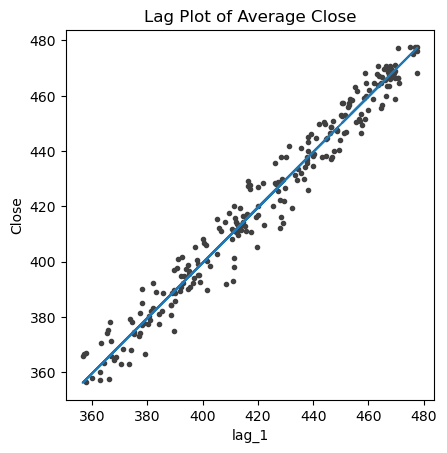

In [31]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set(aspect='equal', ylabel='Close', xlabel='lag_1', title='Lag Plot of Average Close')
